In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('all_seasons.csv')

# Inspect the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics for the dataset
print(df.describe())


   Unnamed: 0       player_name team_abbreviation   age  player_height  \
0           0  Randy Livingston               HOU  22.0         193.04   
1           1  Gaylon Nickerson               WAS  28.0         190.50   
2           2      George Lynch               VAN  26.0         203.20   
3           3    George McCloud               LAL  30.0         203.20   
4           4      George Zidek               DEN  23.0         213.36   

   player_weight                college country draft_year draft_round  ...  \
0      94.800728        Louisiana State     USA       1996           2  ...   
1      86.182480  Northwestern Oklahoma     USA       1994           2  ...   
2     103.418976         North Carolina     USA       1993           1  ...   
3     102.058200          Florida State     USA       1989           1  ...   
4     119.748288                   UCLA     USA       1995           1  ...   

    pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0

In [5]:
# Handle missing values - here we can drop rows with missing values in the "college" column
df_cleaned = df.dropna(subset=['college'])

# Remove extreme values (for instance, net_rating below -50 or above 50 might be anomalies)
df_cleaned = df_cleaned[(df_cleaned['net_rating'] > -50) & (df_cleaned['net_rating'] < 50)]

# Optionally, remove duplicate rows (if applicable)
df_cleaned = df_cleaned.drop_duplicates()

# Confirm the data is clean
print(df_cleaned.isnull().sum())
print(df_cleaned.describe())


Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64
         Unnamed: 0           age  player_height  player_weight            gp  \
count  10880.000000  10880.000000   10880.000000   10880.000000  10880.000000   
mean    6278.760294     27.193842     199.757836      99.623101     51.152390   
std     3776.801617      4.304780       8.911158      12.163215     24.940568   
min        0.000000     19.000000     160.020000      60.327736      1.000000   
25%     2912.750000     24.000000     193.040000      90.718400     31.00000

In [9]:
# Creating Age Group feature
bins = [18, 24, 29, 34, 100]  # Define age groups
labels = ['Young', 'Prime', 'Veteran', 'Senior']  # Labels for each group
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Creating a 5-game moving average for points (pts)
df['pts_ma'] = df['pts'].rolling(window=5).mean()

# You can also add other performance trends for other stats like assists or rebounds


In [49]:
# Convert player height from cm to meters for BMI calculation
df['player_height_m'] = df['player_height'] / 100

# Calculate BMI: weight (kg) / height (m)^2
df['bmi'] = df['player_weight'] / (df['player_height_m']**2)

# You can now check the new columns
df[['player_name', 'player_weight', 'player_height', 'bmi']].head()


,player_name,player_weight,player_height,bmi
0,Randy Livingston,94.800728,193.04,25.439997
1,Gaylon Nickerson,86.182480,190.50,23.748109
2,George Lynch,103.418976,203.20,25.046833
3,George McCloud,102.058200,203.20,24.717270
4,George Zidek,119.748288,213.36,26.305303


In [11]:
from sklearn.preprocessing import StandardScaler

# Define the features to standardize
features_to_standardize = ['player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'net_rating']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the standardization to the selected features
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])


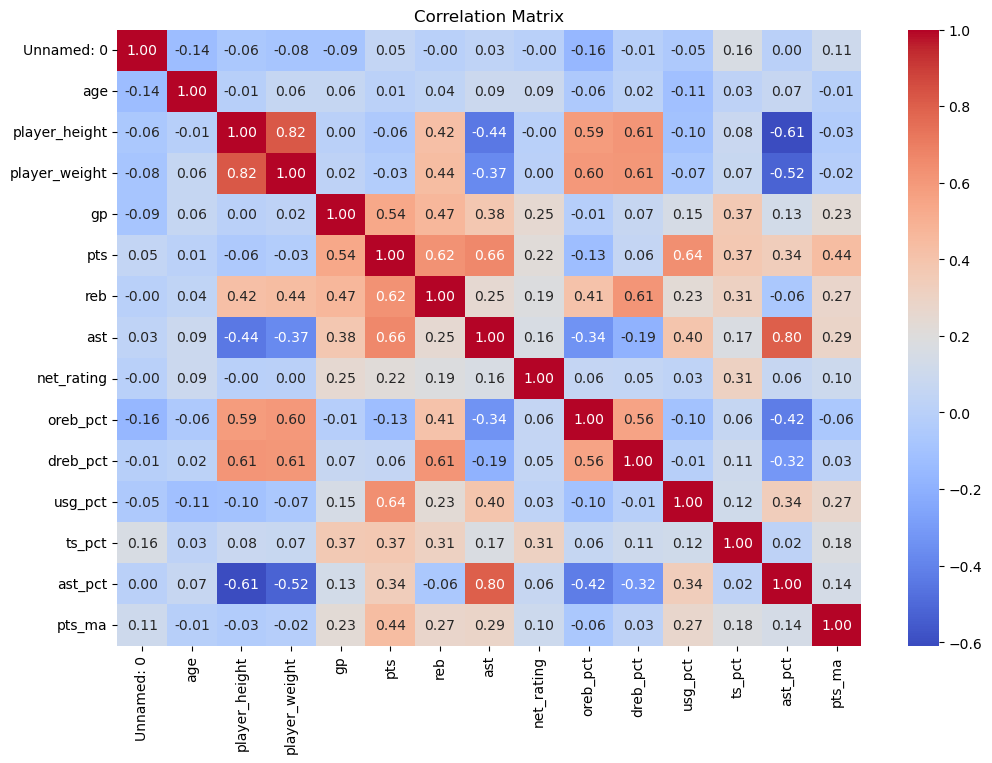

In [55]:
# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Now calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [57]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

# Initialize the Ridge regression model with alpha = 1.0
ridge_model = Ridge(alpha=1.0)

# Train the Ridge regression model
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
ridge_predictions = ridge_model.predict(X_test)

# Calculate R-squared for Ridge regression
ridge_r2 = ridge_model.score(X_test, y_test)

# Calculate Mean Absolute Error for Ridge regression
ridge_mae = mean_absolute_error(y_test, ridge_predictions)

# Display the results
print(f'Ridge Regression R-squared: {ridge_r2:.4f}')
print(f'Ridge Regression MAE: {ridge_mae:.4f}')


Ridge Regression R-squared: 0.8134
Ridge Regression MAE: 1.9637


In [17]:
# Features (independent variables)
X = df[['age', 'player_height', 'player_weight', 'gp', 'reb', 'ast', 'net_rating', 
        'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]  # include relevant features

# Target (dependent variable)
y = df['pts']  # target variable is points scored


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Predictions using Linear Regression
y_pred_lr = lr_model.predict(X)

# Evaluate the model
r_squared_lr = r2_score(y, y_pred_lr)
mae_lr = mean_absolute_error(y, y_pred_lr)

print(f"Linear Regression R-squared: {r_squared_lr:.4f}")
print(f"Linear Regression MAE: {mae_lr:.4f}")


Linear Regression R-squared: 0.8735
Linear Regression MAE: 0.2301


In [21]:
# Get the coefficients for Linear Regression
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


               Coefficient
age              -0.000399
player_height     0.012468
player_weight    -0.000156
gp                0.064934
reb               0.503524
ast               0.483517
net_rating        0.023781
oreb_pct         -3.718858
dreb_pct         -2.860078
usg_pct           7.303183
ts_pct            0.856755
ast_pct          -2.990361


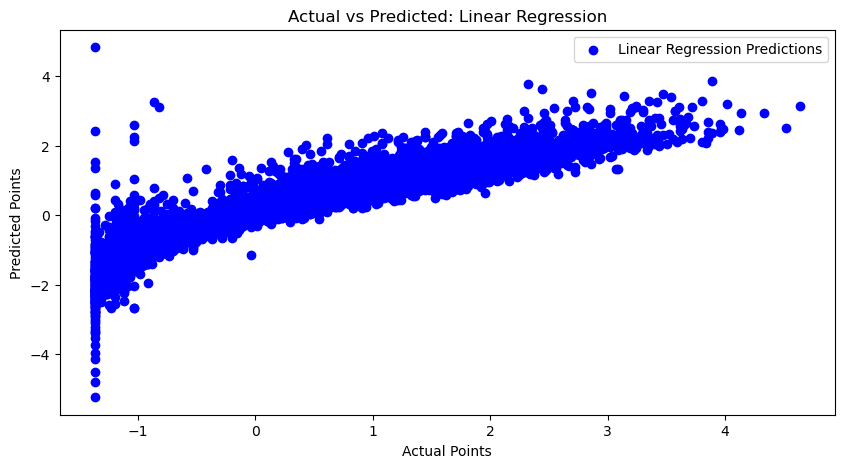

In [23]:
import matplotlib.pyplot as plt

# Plot actual vs predicted for Linear Regression
plt.figure(figsize=(10, 5))
plt.scatter(y, y_pred_lr, color='blue', label='Linear Regression Predictions')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted: Linear Regression')
plt.legend()
plt.show()


In [25]:
# Get the coefficients for Linear Regression
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Display the sorted coefficients
print(coefficients)


               Coefficient
usg_pct           7.303183
ts_pct            0.856755
reb               0.503524
ast               0.483517
gp                0.064934
net_rating        0.023781
player_height     0.012468
player_weight    -0.000156
age              -0.000399
dreb_pct         -2.860078
ast_pct          -2.990361
oreb_pct         -3.718858


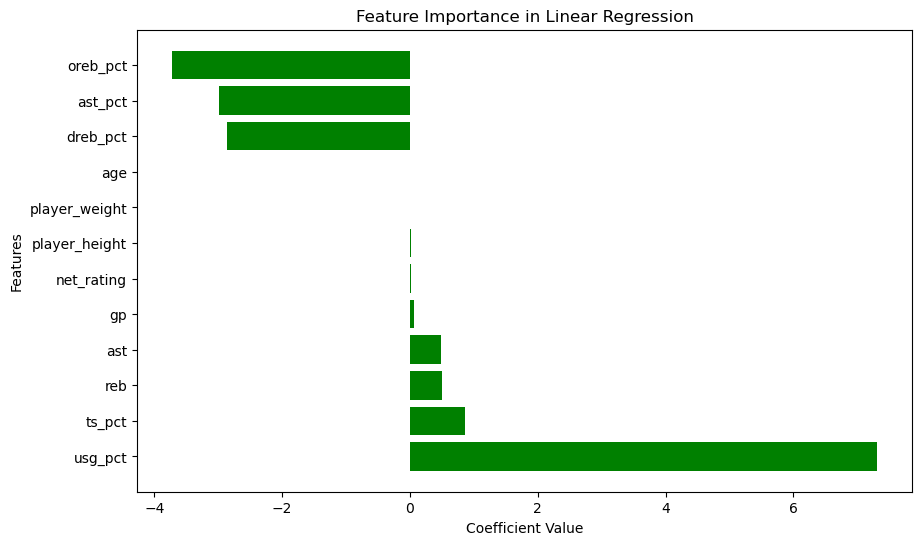

In [27]:
# Plot coefficients of Linear Regression
plt.figure(figsize=(10, 6))
plt.barh(coefficients.index, coefficients['Coefficient'], color='green')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Linear Regression')
plt.show()


In [41]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.linear_model import Ridge

# Define and train the Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Predictions using Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)


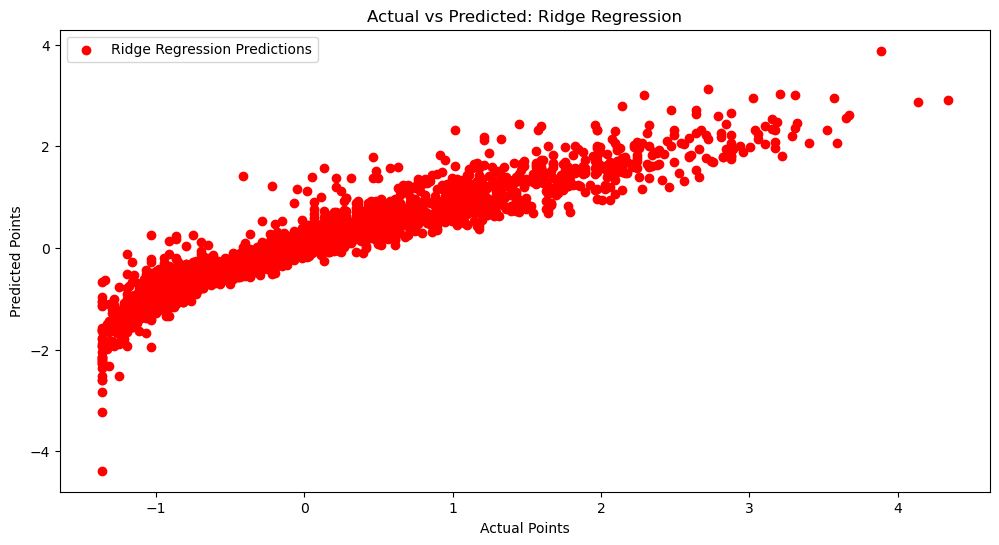

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Assuming X and y have been defined earlier in the code
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Predictions using Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)

# Plotting Actual vs Predicted for Ridge Regression
plt.figure(figsize=(12, 6))

# Ridge Regression Plot
plt.scatter(y_test, y_pred_ridge, color='red', label='Ridge Regression Predictions')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted: Ridge Regression')
plt.legend()

plt.show()


In [53]:
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming you have already trained both models (lr_model for Linear Regression and ridge_model for Ridge Regression)
# and have your predictions ready.

# For Linear Regression
y_pred_lr = lr_model.predict(X_test)  # Replace X_test with your test data
lr_r2 = r2_score(y_test, y_pred_lr)  # Calculate R-squared for Linear Regression
lr_mae = mean_absolute_error(y_test, y_pred_lr)  # Calculate MAE for Linear Regression

# For Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)  # Replace X_test with your test data
ridge_r2 = r2_score(y_test, y_pred_ridge)  # Calculate R-squared for Ridge Regression
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)  # Calculate MAE for Ridge Regression

# Print the R-squared and MAE values
print(f"Linear Regression R-squared: {lr_r2:.4f}")
print(f"Linear Regression MAE: {lr_mae:.4f}")
print(f"Ridge Regression R-squared: {ridge_r2:.4f}")
print(f"Ridge Regression MAE: {ridge_mae:.4f}")

# Comparing the models based on R-squared and MAE
if lr_r2 > ridge_r2:
    print("Linear Regression performs better based on R-squared.")
else:
    print("Ridge Regression performs better based on R-squared.")

if lr_mae < ridge_mae:
    print("Linear Regression performs better based on MAE.")
else:
    print("Ridge Regression performs better based on MAE.")


Linear Regression R-squared: 0.8900
Linear Regression MAE: 0.2260
Ridge Regression R-squared: 0.8871
Ridge Regression MAE: 0.2282
Linear Regression performs better based on R-squared.
Linear Regression performs better based on MAE.
